<a href="https://colab.research.google.com/github/Harshit-code-tech/PRODIGY_ML_04/blob/main/prodigy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) connect kaggle and collab
2) import kaggle.json file which contain api token
3)make a kaggle dir
4)download the setdata

In [ ]:
import zipfile
import os

with zipfile.ZipFile("/content/leapgestrecog.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/leapgestrecog")

In [ ]:
# Define the path to the dataset directory
dataset_dir = "/content/leapgestrecog/leapGestRecog"

In [ ]:
# List all subject folders
subject_folders = sorted(os.listdir(dataset_dir))

# Loop through each subject folder
for subject_folder in subject_folders:
    subject_path = os.path.join(dataset_dir, subject_folder)
    print("Subject:", subject_folder)

    # List all gesture folders for the current subject
    gesture_folders = sorted(os.listdir(subject_path))
    for gesture_folder in gesture_folders:
        gesture_path = os.path.join(subject_path, gesture_folder)
        print("\tGesture:", gesture_folder)

        # List all images for the current gesture
        image_files = sorted(os.listdir(gesture_path))
        print("\t\tNumber of Images:", len(image_files))


Subject: 00
	Gesture: 01_palm
		Number of Images: 200
	Gesture: 02_l
		Number of Images: 200
	Gesture: 03_fist
		Number of Images: 200
	Gesture: 04_fist_moved
		Number of Images: 200
	Gesture: 05_thumb
		Number of Images: 200
	Gesture: 06_index
		Number of Images: 200
	Gesture: 07_ok
		Number of Images: 200
	Gesture: 08_palm_moved
		Number of Images: 200
	Gesture: 09_c
		Number of Images: 200
	Gesture: 10_down
		Number of Images: 200
Subject: 01
	Gesture: 01_palm
		Number of Images: 200
	Gesture: 02_l
		Number of Images: 200
	Gesture: 03_fist
		Number of Images: 200
	Gesture: 04_fist_moved
		Number of Images: 200
	Gesture: 05_thumb
		Number of Images: 200
	Gesture: 06_index
		Number of Images: 200
	Gesture: 07_ok
		Number of Images: 200
	Gesture: 08_palm_moved
		Number of Images: 200
	Gesture: 09_c
		Number of Images: 200
	Gesture: 10_down
		Number of Images: 200
Subject: 02
	Gesture: 01_palm
		Number of Images: 200
	Gesture: 02_l
		Number of Images: 200
	Gesture: 03_fist
		Number of I


Palm Gesture Images for Subject 00:


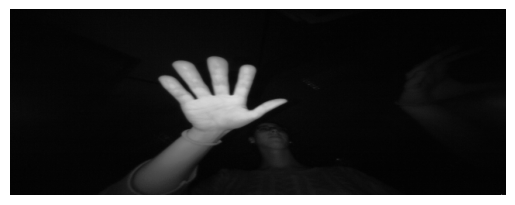

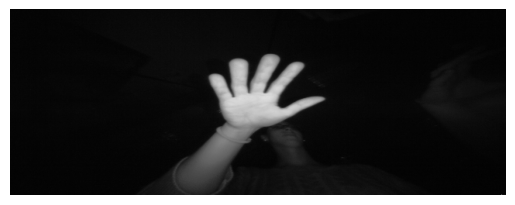

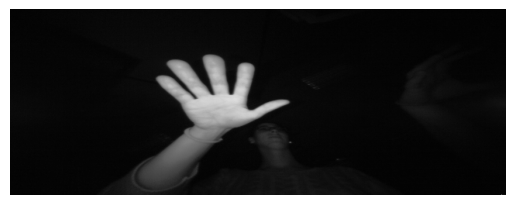

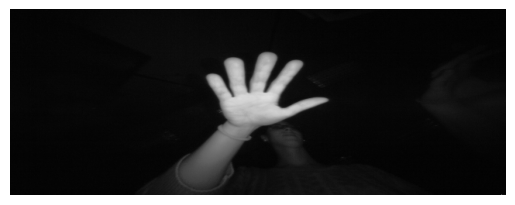

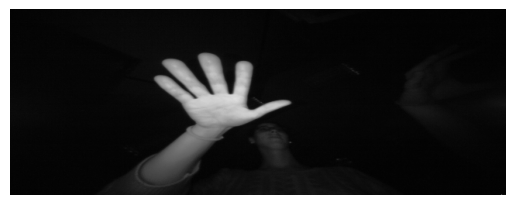

In [ ]:
import cv2
import matplotlib.pyplot as plt
print("\nPalm Gesture Images for Subject 00:")
for img_name in image_files[:5]:
    # Load the image
    img_path = os.path.join(gesture_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
image_paths = []
labels = []

# Loop through each subject folder
for subject_folder in os.listdir(dataset_dir):
    subject_path = os.path.join(dataset_dir, subject_folder)

    # Loop through each gesture folder for the current subject
    for gesture_folder in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture_folder)

        # Loop through each image file for the current gesture
        for img_name in os.listdir(gesture_path):
            # Append the image path and corresponding label to the lists
            image_paths.append(os.path.join(gesture_path, img_name))
            labels.append(gesture_folder)

# Convert labels to numerical values
label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])

# Split the dataset into combined training and validation sets, and test set
combined_train_images, test_images, combined_train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

# Further split the combined training and validation set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    combined_train_images, combined_train_labels, test_size=0.125, random_state=42, stratify=combined_train_labels
)

# Print the sizes of the splits
print("Number of training images:", len(train_images))
print("Number of validation images:", len(val_images))
print("Number of test images:", len(test_images))

Number of training images: 14000
Number of validation images: 2000
Number of test images: 4000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions for resizing (consider smaller sizes for efficiency)
img_width, img_height = 150, 150

# Function to preprocess an image (use less memory for loading)
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype("float32") / 255.0
    return img

# Define empty lists to store training and validation image paths
train_images = []
val_images = []

train_data_dir = dataset_dir

# Loop through subdirectories and collect image paths
for directory in os.listdir(train_data_dir):
    class_label = directory
    for img_filename in os.listdir(os.path.join(train_data_dir, directory)):
        img_path = os.path.join(train_data_dir, directory, img_filename)
        train_images.append((img_path, class_label))  # Store path and label as a tuple

# Preprocess training and validation images using a generator (processes in batches)
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()  # No data augmentation for validation

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=8,
    class_mode='categorical'

)

val_generator = val_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

print("Preprocessing using image generators for memory efficiency!")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Found 20000 images belonging to 10 classes.
Found 20000 images belonging to 10 classes.
Preprocessing using image generators for memory efficiency!
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 82

In [ ]:
# Fit the model to the training data
history = model.fit(train_generator, epochs=10, batch_size=8, validation_data=val_generator)

# Evaluate the model on the test data using the test generator
test_loss, test_acc = model.evaluate(val_generator)
print("Test Accuracy:", test_acc)
# Save the trained model
model.save("hand_gesture_recognition_model.h5")
print("Model saved successfully")


Epoch 1/10
2500/2500 [==============================] - 1298s 519ms/step - loss: 2.6572 - accuracy: 0.2548 - val_loss: 1.2089 - val_accuracy: 0.6108
Epoch 2/10
2500/2500 [==============================] - 1264s 506ms/step - loss: 1.3281 - accuracy: 0.5332 - val_loss: 0.5626 - val_accuracy: 0.7818
Epoch 3/10
2500/2500 [==============================] - 1256s 502ms/step - loss: 0.9091 - accuracy: 0.6756 - val_loss: 0.3222 - val_accuracy: 0.8959
Epoch 4/10
2500/2500 [==============================] - 1234s 494ms/step - loss: 0.7759 - accuracy: 0.7239 - val_loss: 0.3349 - val_accuracy: 0.8806
Epoch 5/10
2500/2500 [==============================] - 1229s 492ms/step - loss: 0.6871 - accuracy: 0.7568 - val_loss: 0.2344 - val_accuracy: 0.9200
Epoch 6/10
2500/2500 [==============================] - 1241s 496ms/step - loss: 0.6279 - accuracy: 0.7825 - val_loss: 0.1466 - val_accuracy: 0.9497
Epoch 7/10
2500/2500 [==============================] - 1233s 493ms/step - loss: 0.5768 - accuracy: 0.7994

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully


In [39]:
import random
import pandas as pd
from tensorflow.keras.models import load_model
# Load the saved model
saved_model_path = "hand_gesture_recognition_model.h5"
model = load_model(saved_model_path)


In [45]:
# Function to fetch random images for testing
def fetch_random_images(dataset_dir, num_images=20):
    random_images = []
    for _ in range(num_images):
        # Select a random subject folder
        subject_folder = random.choice(os.listdir(dataset_dir))
        subject_path = os.path.join(dataset_dir, subject_folder)

        # Select a random gesture folder within the subject folder
        gesture_folder = random.choice(os.listdir(subject_path))
        gesture_path = os.path.join(subject_path, gesture_folder)

        # Select a random image within the gesture folder
        image_name = random.choice(os.listdir(gesture_path))
        image_path = os.path.join(gesture_path, image_name)

        random_images.append((image_name, image_path))

    return random_images
# Fetch random images for testing
random_images = fetch_random_images(dataset_dir)
# Predict gestures for random images
predictions = []
for image_name, image_path in random_images:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    predictions.append(predicted_label)
import csv
# Create CSV file with image details and predictions
csv_file = "test_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image Name", "Image Path", "Predicted Gesture"])
    for (image_name, image_path), predicted_label in zip(random_images, predictions):
        writer.writerow([image_name, image_path, predicted_label])

print("CSV file with test predictions created successfully:", csv_file)

1/1 [==============================] - 0s 32ms/step
CSV file with test predictions created successfully: test_predictions.csv
